# Converting yfinance data frames

__Author: Umair ul Hassan__

We begin with the setup.

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pyspark.pandas as ps
from pyspark.sql import SparkSession

import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

# find Spark and Python executables
import findspark
findspark.init()
findspark.find()

/opt/anaconda3/envs/wednesday/lib/python3.11/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


'/opt/anaconda3/envs/wednesday/lib/python3.11/site-packages/pyspark'

Create Spark session

In [3]:
spark = SparkSession.builder.getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/17 18:16:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/17 18:16:23 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
bb = yf.Ticker("SPXS")

In [5]:
data = bb.history("3mo")

Calclate summary statistics

In [6]:
closing_prices = data["Close"]

print( "Mean: " + str(closing_prices.mean()) )
print( "Standard Deviation: " + str(closing_prices.std()) )
print( "Minimum: " + str(closing_prices.min()) )
print( "Maximum: " + str(closing_prices.max()) )
print( "Median: " + str(closing_prices.median()) )

Mean: 5.92689742416632
Standard Deviation: 0.23185662804921978
Minimum: 5.599999904632568
Maximum: 6.460000038146973
Median: 5.829999923706055


Plot the pricess of ETF

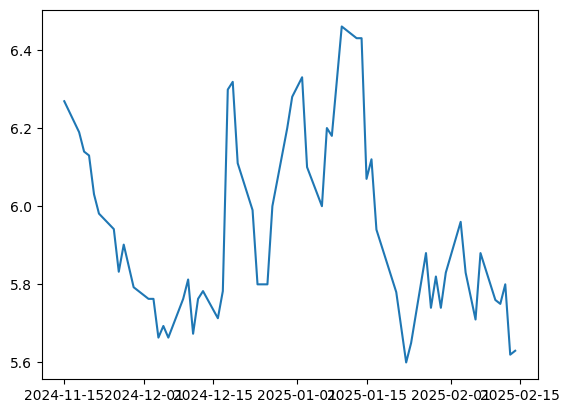

In [7]:
plt.plot(closing_prices)

Conver to a Spark DataFrame

In [8]:
sdata = spark.createDataFrame(data)

In [9]:
sdata.printSchema()

root
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Dividends: double (nullable = true)
 |-- Stock Splits: double (nullable = true)
 |-- Capital Gains: double (nullable = true)



Covert to a Dataframe using Pandas-on-Spark

In [10]:
# remove timezone from index
data.index = data.index.tz_localize(None)

# conver to Pandas-on-Spark dataframe
psdata = ps.from_pandas(data)

Ploting the high prices. Note that Pandas API on Spark requires the `plotly` package.

In [18]:
import plotly

psdata["High"].plot()